# On Analyzing Real World Time Series for Forecasting: Generated Random Walk TS
- [RW Notes](https://detraviousjbrinkley.notion.site/Random-Walk-RW-Drunkard-s-Walk-DW-70ef3c2fd4324572adf86b7403ff3690?pvs=4)

In [1]:
from collections import namedtuple
from ts_models import Model, AR, EvaluationMetric
from data_loader import build_any_univariate_time_series
from time_series import TimeSeriesFactory, UnivariateTimeSeries

## Generated Stationary Data Pipeline

1. Load Raw Data
2. Plot Raw Data
3. Get Descriptive Statistics (ie: mean, median, etc)
4. Check Stationarity of Raw Data
5. Plot Autocorrelation and Partial Autocorrelation
6. Split Data
7. Initialize Autoregressive AR(p) Model
8. Predict Forecasts
9. Plot Actual Forecasts vs Predicted Forecasts

### Load Raw Data

In [2]:
file = "../datasets/generated_random_walk_ts.npy"

In [3]:
generated_stationary_ts = build_any_univariate_time_series(file)
generated_stationary_ts

UnivariateTimeSeries(Observations)

In [4]:
gsts_df = generated_stationary_ts.get_as_df()
gsts_df

,Observations
Timestamp,
0,-1
1,0
2,1
3,0
4,-1
...,...
995,54
996,55
997,54


### Plot Raw Data

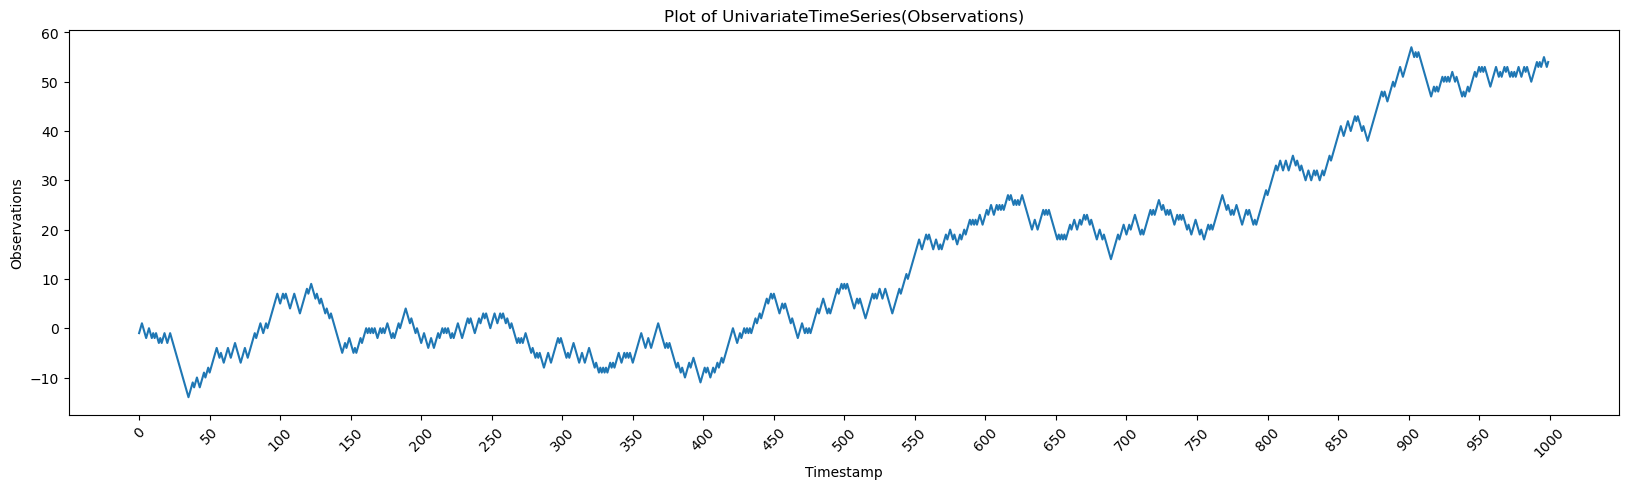

In [5]:
generated_stationary_ts.plot(tick_skip=50)

### Get Descriptive Statistics

In [6]:
generated_stationary_ts.get_statistics()

,Observations
count,1000.000000
mean,13.738000
std,19.005698
min,-14.000000
25%,-2.000000
50%,6.000000
75%,24.000000
max,57.000000


In [7]:
generated_stationary_ts.max_min_range()

{'Max': Observations    57
 dtype: int64,
 'Min': Observations   -14
 dtype: int64,
 'Range': Observations    71
 dtype: int64}

### Check Stationarity of Raw Data

In [8]:
generated_stationary_ts.stationarity_test(gsts_df)

Series is non-stationary as 0.9791747967918744 > 0.05
ADF Statistic: 0.341605
p-value: 0.979175 > 0.05 , so non-stationary
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


### Plot Autocorrelation and Partial Autocorrelation
- How the relationship between the current observation and it's historical observations correlate at that specific k-th lag.
- In this case, we have a cycle of postive correlation and negative correlation for every 4 observations.
- Look at which points fall outside of blue region.

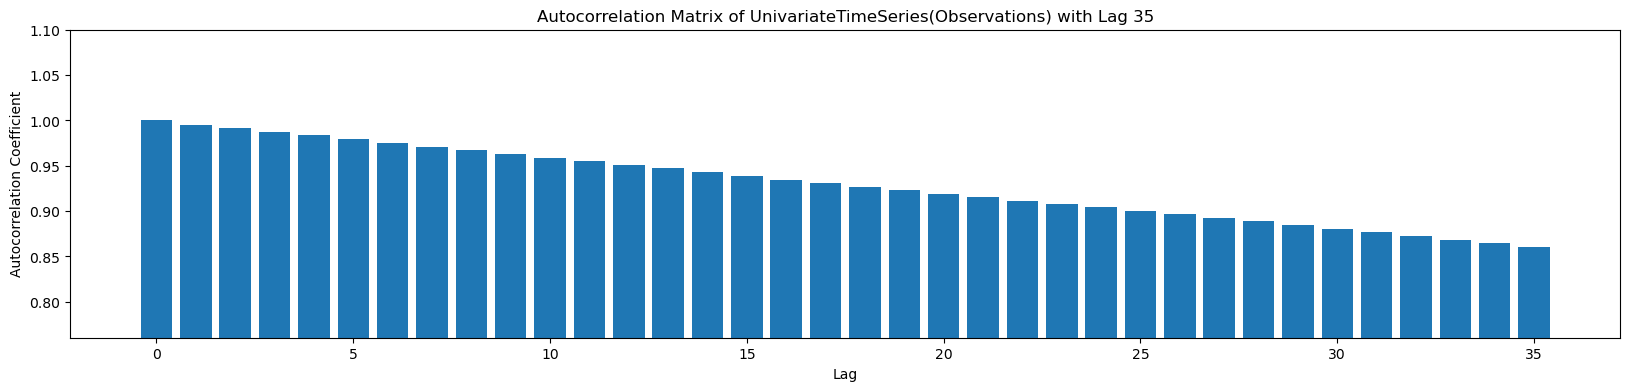

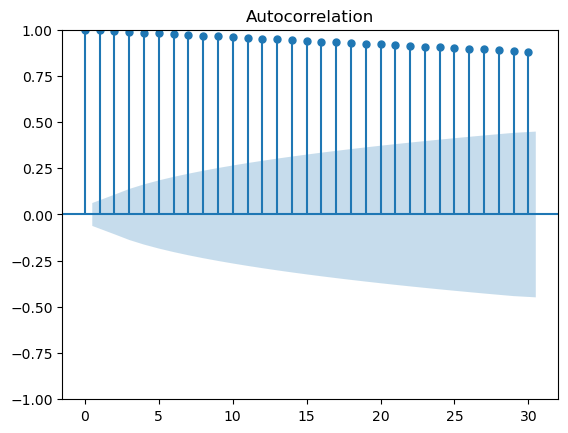

In [9]:
generated_stationary_ts.plot_autocorrelation(35)

- Here, we have a cyclic-like ACorr. Why?

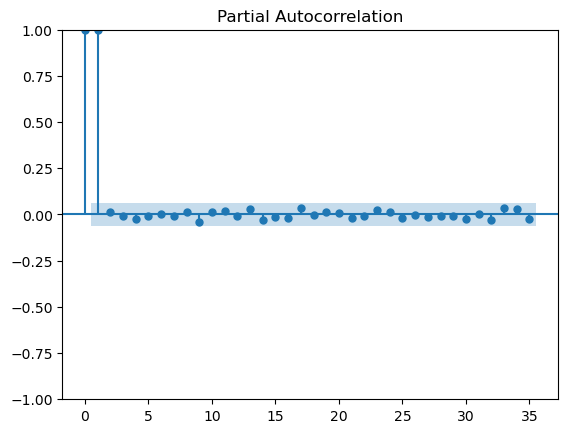

In [10]:
generated_stationary_ts.plot_partial_autocorrelation(35)

- An exponential decay after lag 2.

In [11]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

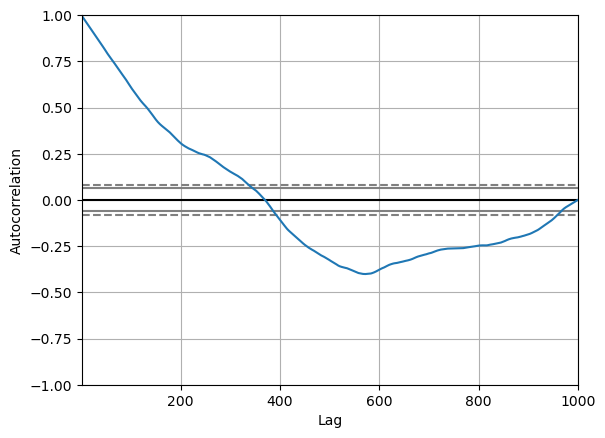

In [12]:
autocorrelation_plot(generated_stationary_ts.get_series())

- How to interpret this type of ACorr plot? Looks different from above. 
- P 97 in Introduction to TSF with Python, Jason Brownlee states that "we generally see the expected trend, in this case across the first few hundred lag observations."

### Split Data
- Splitting so we can forecast the last 7 days. Do this type of forecast to see how model is performing. If model performs how we need, then update notebook to forecast the next 7 days.

In [ ]:
train, validation, test = generated_stationary_ts.get_train_validation_test_split(0.93, 0.0)

In [ ]:
train.get_as_df()

In [ ]:
validation.get_as_df()

In [ ]:
test.get_as_df()

In [ ]:
expected_forecast = test.get_series()
expected_forecast

### Initialize Autoregressive AR(p) Model
- How to determine the proper lag value? Look at the Partial ACor plot. Being that we're out of the blue area at lag 3, we'll set our lag to be 3. 
    - Why Partial ACor plot and not ACor plot?
    - What if we take lags from ACor plot anyway? Say lags 5, 10, and 15 because they all have the most correlation (postive and negative) for their clusters, respectfully.
- How to understand the model summary?

In [ ]:
lags_to_test = [3, 5, 10, 15]

In [ ]:
ar_model_class = AR()

trained_ar_models = ar_model_class.train_ar_model(train.get_series(), lags_to_test)

In [ ]:
len_historical_data, historical_data = train.get_historical_data()
len_historical_data

### Predict Forecasts

In [ ]:
predictions = ar_model_class.ar_predict(trained_ar_models, len_historical_data, train, test)
predictions

In [ ]:
mse_gsts = EvaluationMetric.eval_mse(expected_forecast, predictions)
mse_gsts

### Plot Actual Forecasts vs Predicted Forecasts

In [ ]:
EvaluationMetric.plot_forecast(expected_forecast, predictions, lags_to_test)

### Follow-up
- What can we determine from this?
- Which AR(p) lag performs the best?
- Can we do better?